In [9]:
library(ggplot2)
dat <- data.frame(time = factor(c("Lunch","Dinner"), levels=c("Lunch","Dinner")),total_bill = c(14.89, 17.23))
dat

time,total_bill
Lunch,14.89
Dinner,17.23


## 기본 그래프 그리기

위에서 지정 해준 
- dat
- time
- levels
- total_bill  

이 4 종류의 variables들을 기억 하도록 합니다. 

1. 먼저 그래프에 필요한 환경을 그려 줍니다.  
2. 그려주고서 우리가 넣고 싶은 입력값을 입력해줍니다.  

먼저 ggplot 함수를 입력하면, 그래프의 배경만 생성되고 아무 결과값이 보이지 않는 것을 보실 수 있습니다.  
그 이유는 저희가 어떤 그래프를 그릴 것인지 지정 해주지 않았기 때문 입니다. 

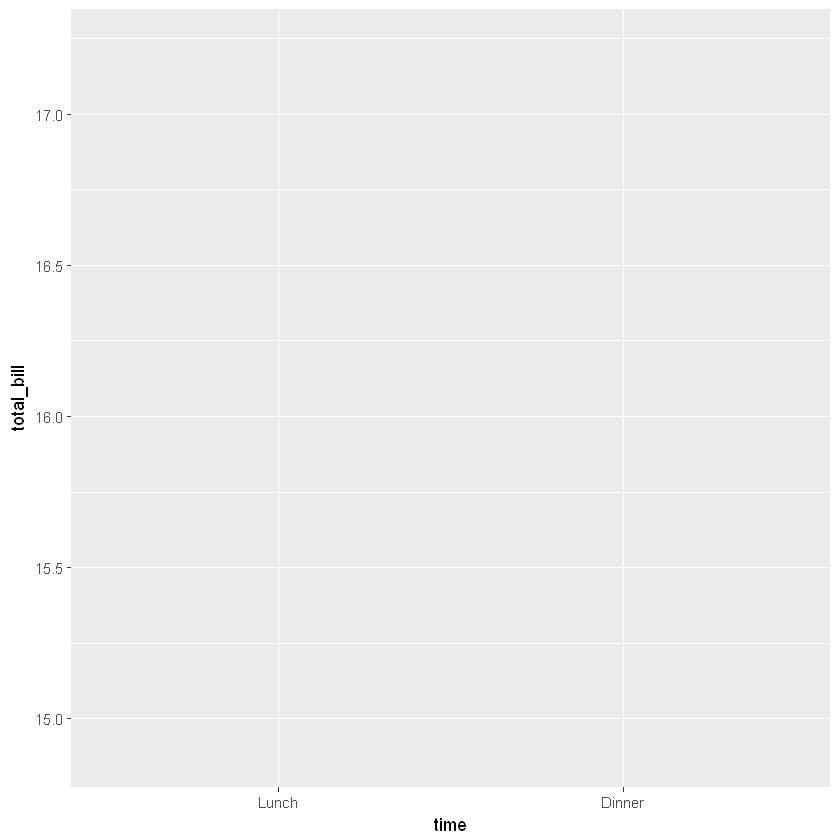

In [13]:
ggplot(data=dat, aes(x=time, y=total_bill))

그럼 앞서 넣었던 함수 뒤에 geom_bar() 함수를 넣으면  
bar graph가 그려집니다.

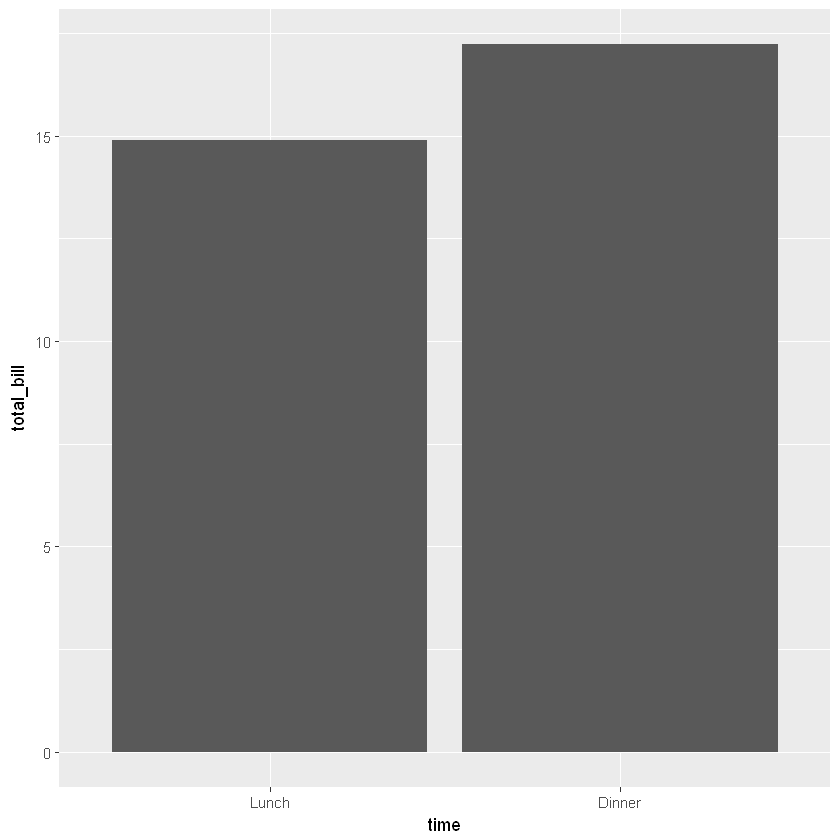

In [14]:
ggplot(data=dat, aes(x=time, y=total_bill)) + geom_bar(stat="identity")

앞에 time이라는 legend(기호설명표)로 fill을 입력 해줍니다.  
여기서 legend는 전설의 legend가 아닙니다. ^^

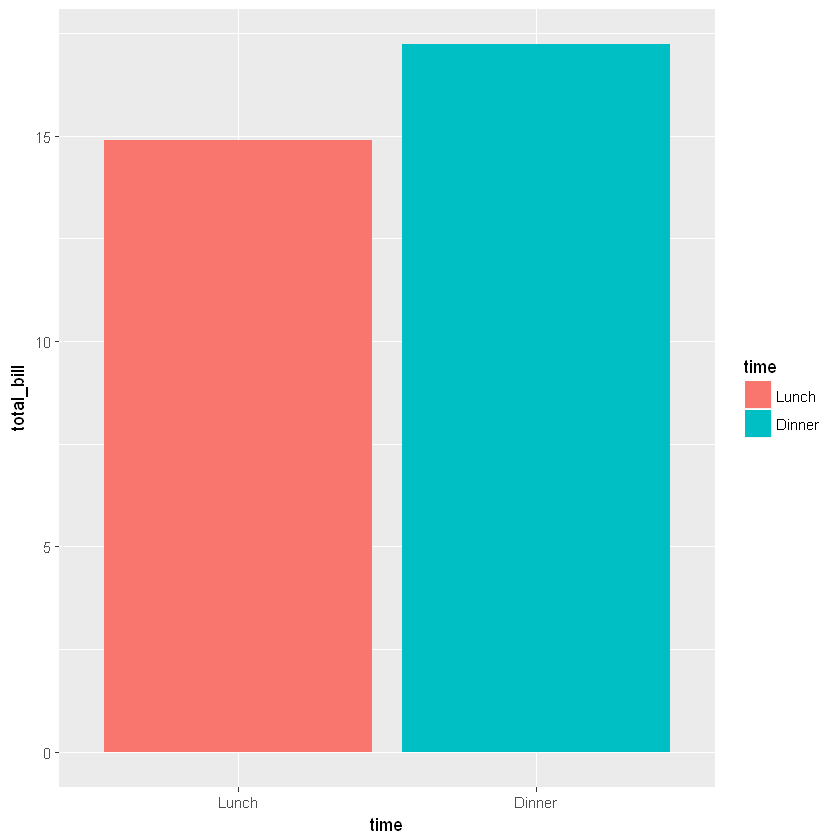

In [24]:
# 오른 쪽에 우리가 입력한 time, bar에 대한 설명표가 생깁니다. 
# 또 두 자료에 대한 값들을 색으로써 구분도 짓게 됩니다. 
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) + geom_bar(stat="identity")

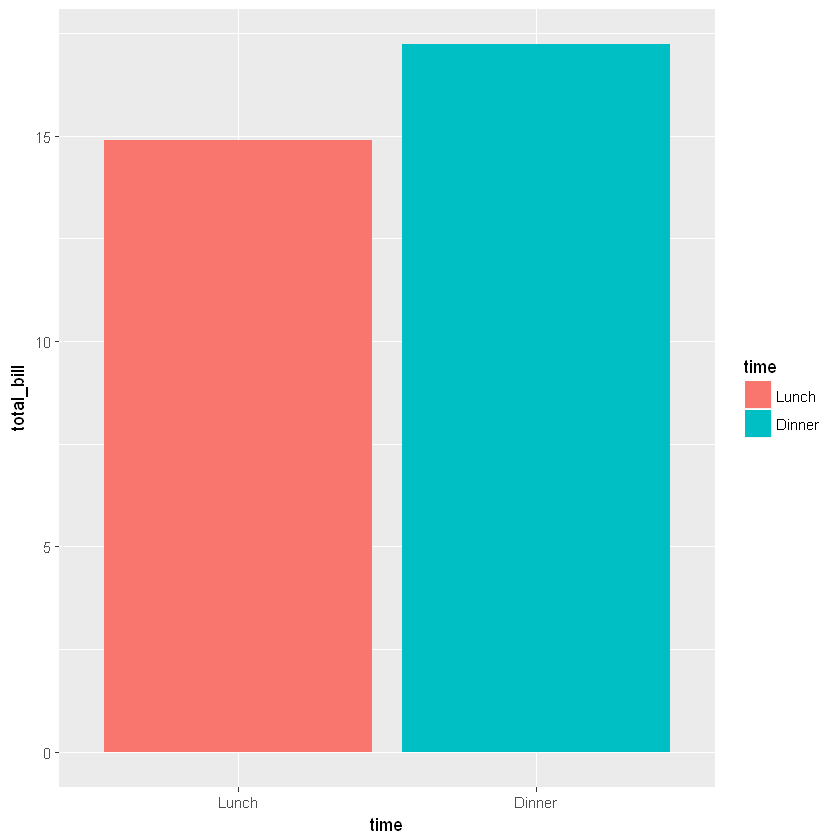

In [17]:
# 아래와 같이 하셔도 같은 결과가 나옵니다.
ggplot(data=dat, aes(x=time, y=total_bill)) + geom_bar(aes(fill=time), stat="identity")

geom_bar 에 colour를 'black'을 넣어주시면, 그래프 겉에 검은색 테두리가 생긴 것을 확인 할 수 있습니다.  
'yellow'나 'red'와 같이 다른 색을 넣어도 되지만, 이번엔 'black'으로 하도록 하겠습니다.

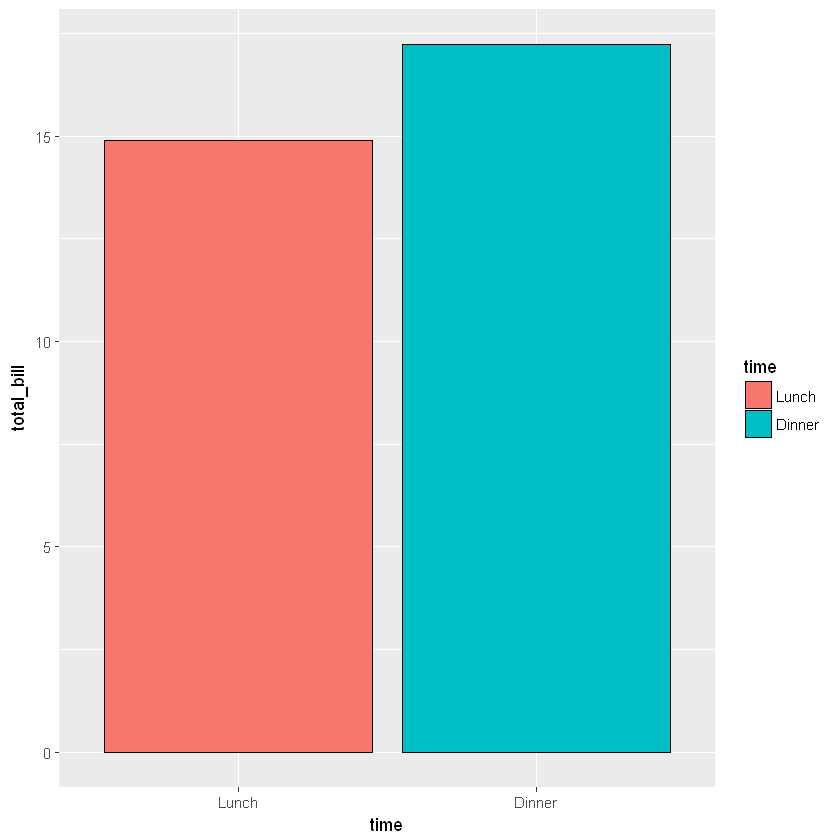

In [21]:
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) + geom_bar(colour="black", stat="identity")

색은 유지하고, 우측에 있던 legend를 없애주고 싶은 경우  
guides에 fille을 FALSE로 지정 해주면 안 보이고 그래프가 빈 공간을 좀 더 채우는 것을 보실 수 있습니다.

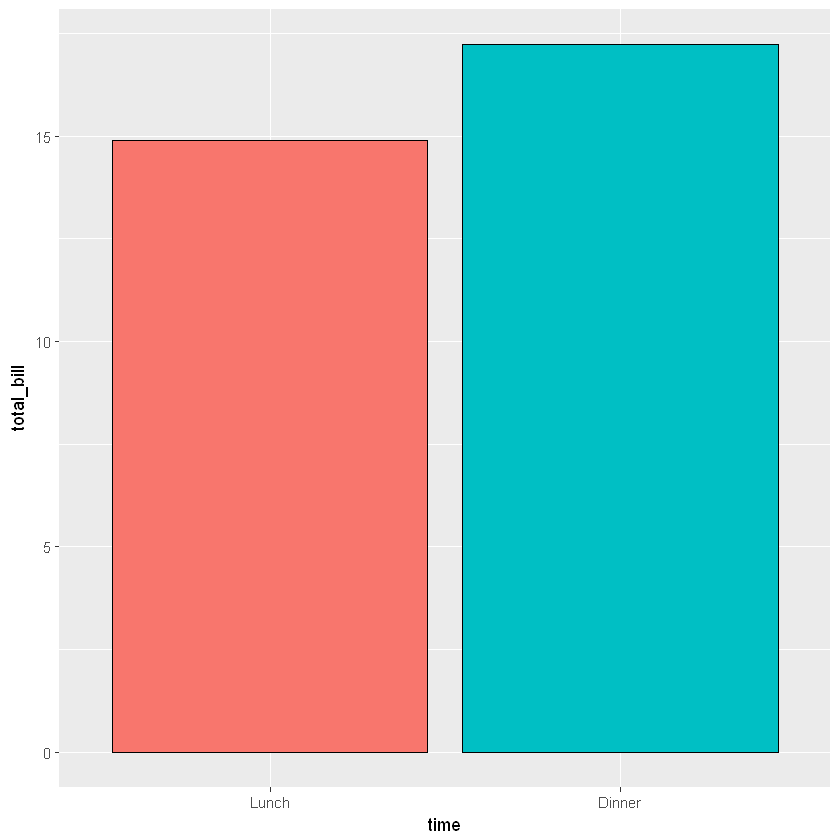

In [22]:
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) +
    geom_bar(colour="black", stat="identity") +
    guides(fill=FALSE)

아래와 같이 다양한 입력값을 합쳐서 이런 그래프도 그릴 수도 있습니다

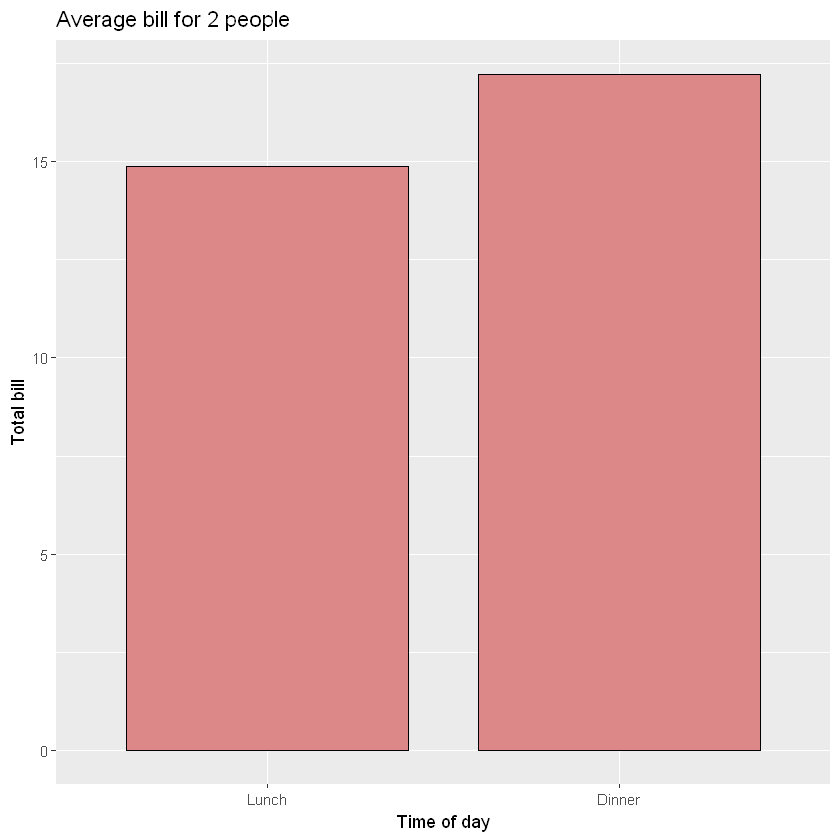

In [25]:
ggplot(data=dat, aes(x=time, y=total_bill, fill=time)) + 
    geom_bar(colour="black", fill="#DD8888", width=.8, stat="identity") + 
    guides(fill=FALSE) +
    xlab("Time of day") + ylab("Total bill") +
    ggtitle("Average bill for 2 people")

### 다른 graph visualization tool을 통해 새로운 그래프를 보도록 하겠습니다.

In [32]:
library(reshape2)
# reshape2 library에서 제공 해주는 기본 데이터 tips를 사용하도록 하겠습니다.
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


위에서 배운 것처럼 간단히 그려 보도록 하겠습니다. 

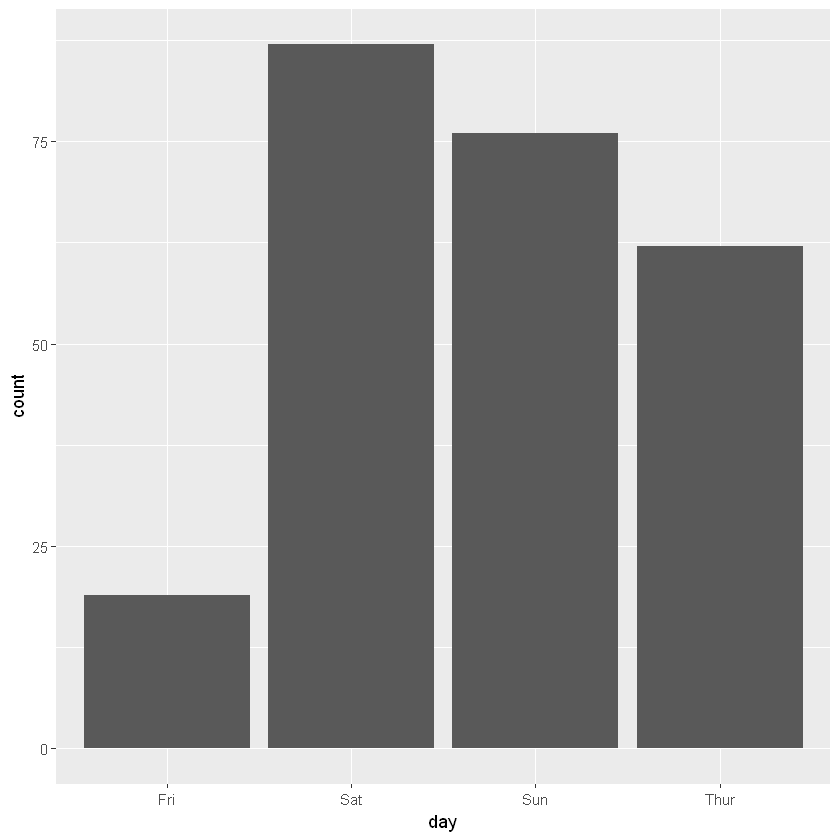

In [34]:
ggplot(data=tips, aes(x=day)) + geom_bar(stat="count")

위에선 bar_graph()를 사용하여, bar graph 만 그렸지만,  
geom_line()을 사용하면 line graph를 그릴 수 있게 됩니다.

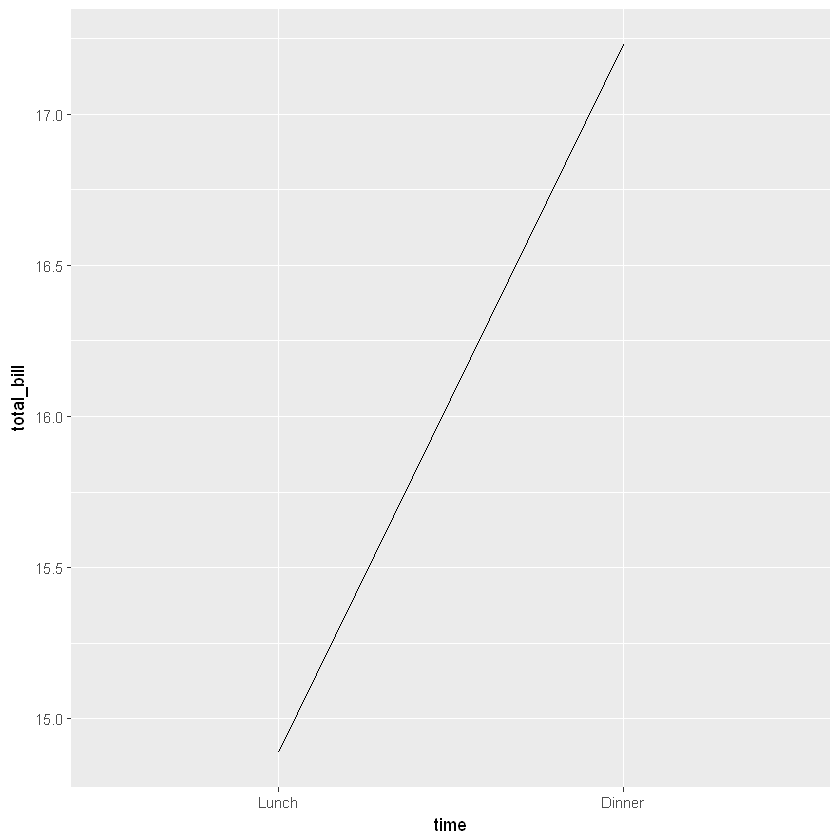

In [33]:
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) + geom_line()

geom_point() 추가하면 선의 끝에 점을 찍게 됩니다.

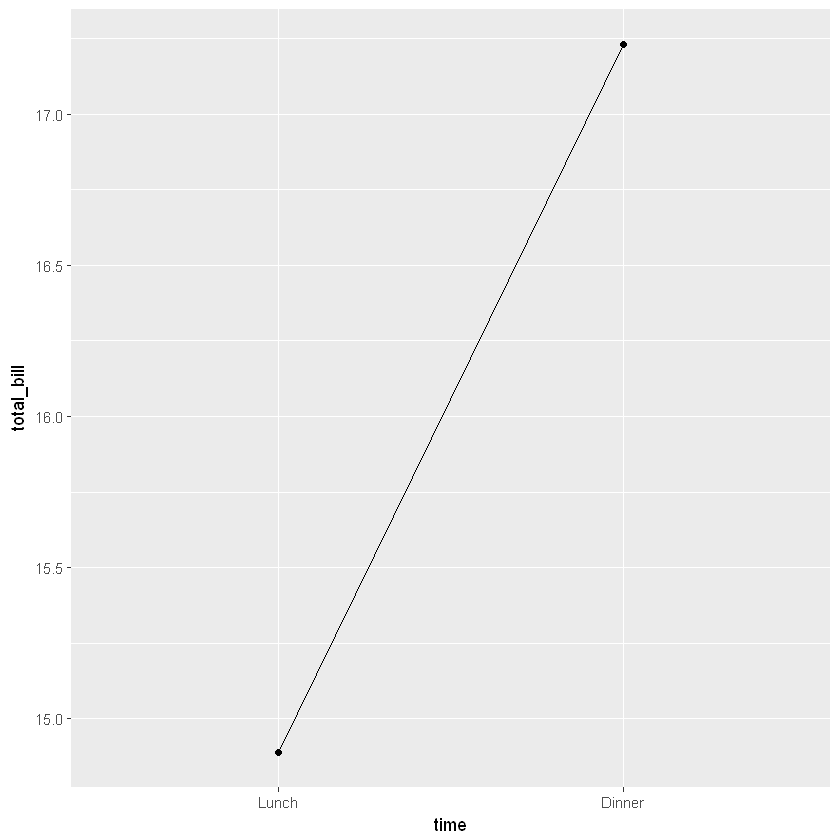

In [36]:
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) + geom_line() + geom_point()

각 함수 마다 색을 지정 할 수도, 사이즈도 지정이 가능.  
가능하면 여러 색으로 바꿔보기도 하고, 사이즈나 fill을 바꿔 가면서 다양한 기능을 살펴보도록 합니다.

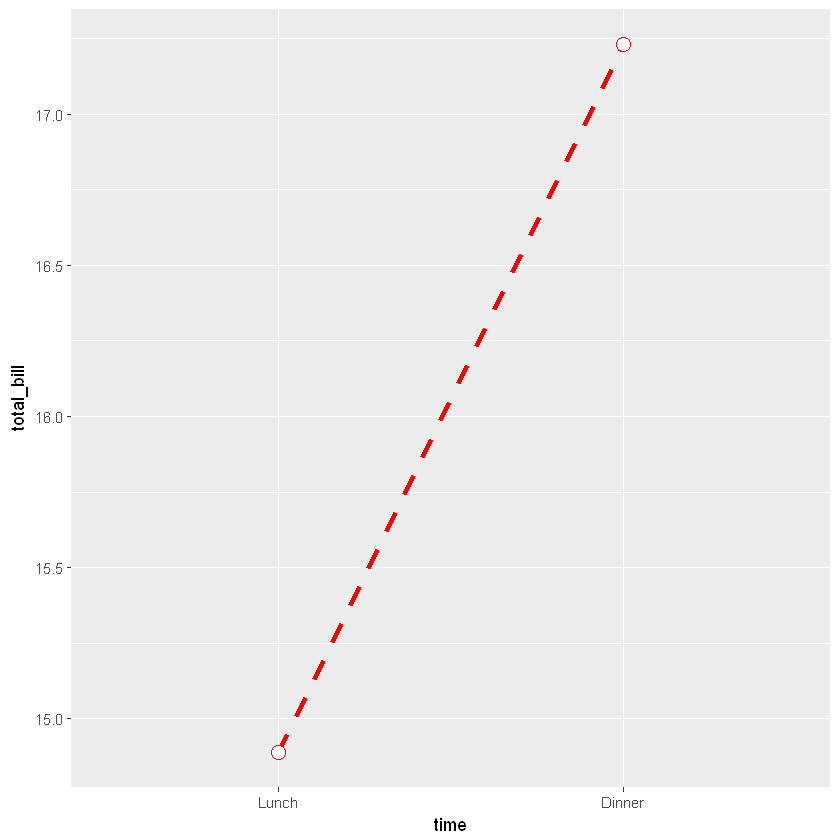

In [38]:
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) + 
    geom_line(colour="red", linetype="dashed", size=1.5) + 
    geom_point(colour="red", size=4, shape=21, fill="white")   

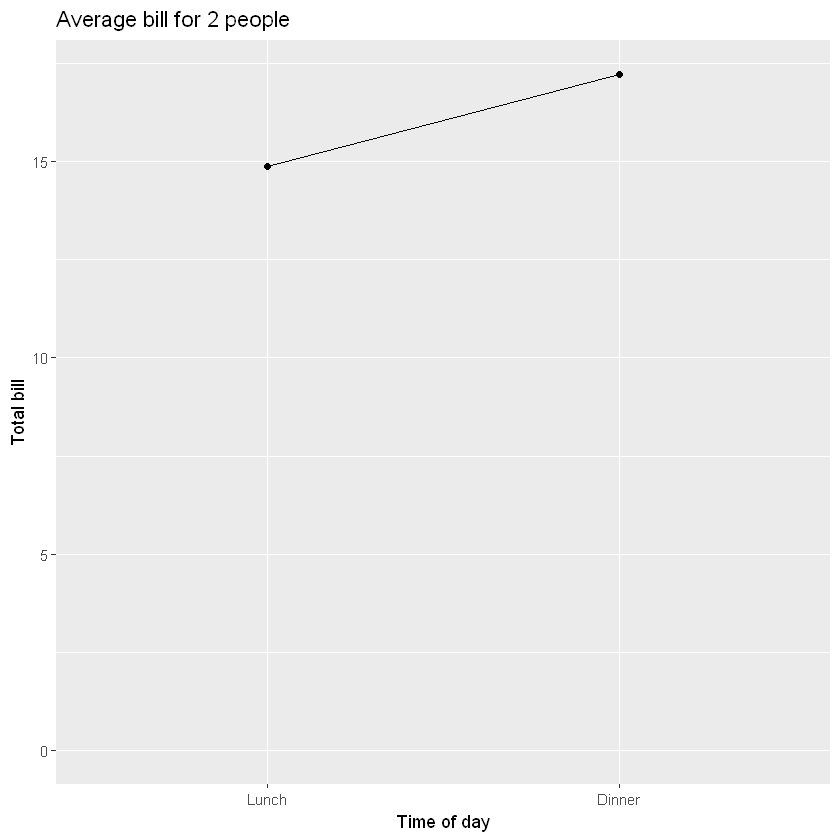

In [39]:
ggplot(data=dat, aes(x=time, y=total_bill, group=1)) +
    geom_line() +
    geom_point() +
    expand_limits(y=0) +   # 위에 그래프에서 y축은 데이터 range에 따라 알아서 최소값과 최대값을 지정 해주었지만, 
                           # 왼쪽 처럼 limits를 지정 해주면 아래 그래프와 같이 y축의 최소 값이 보여지게 됩니다. 
    xlab("Time of day") + ylab("Total bill") +   # x와 y축의 이름을 지정 해줍니다. 
    ggtitle("Average bill for 2 people")   # 그래프의 제목을 지정 해줍니다. 

### 다양한 variables들이 들어간 그래프

In [43]:
dat1 <- data.frame(
    sex = factor(c("Female","Female","Male","Male")),
    time = factor(c("Lunch","Dinner","Lunch","Dinner"), levels=c("Lunch","Dinner")),
    total_bill = c(13.53, 16.81, 16.24, 17.42))
dat1

sex,time,total_bill
Female,Lunch,13.53
Female,Dinner,16.81
Male,Lunch,16.24
Male,Dinner,17.42


fill을 time이 아닌 새로운 variable인 'sex'를 넣게 되면 아래와 같이 위와 다른 그래프가 생깁니다.

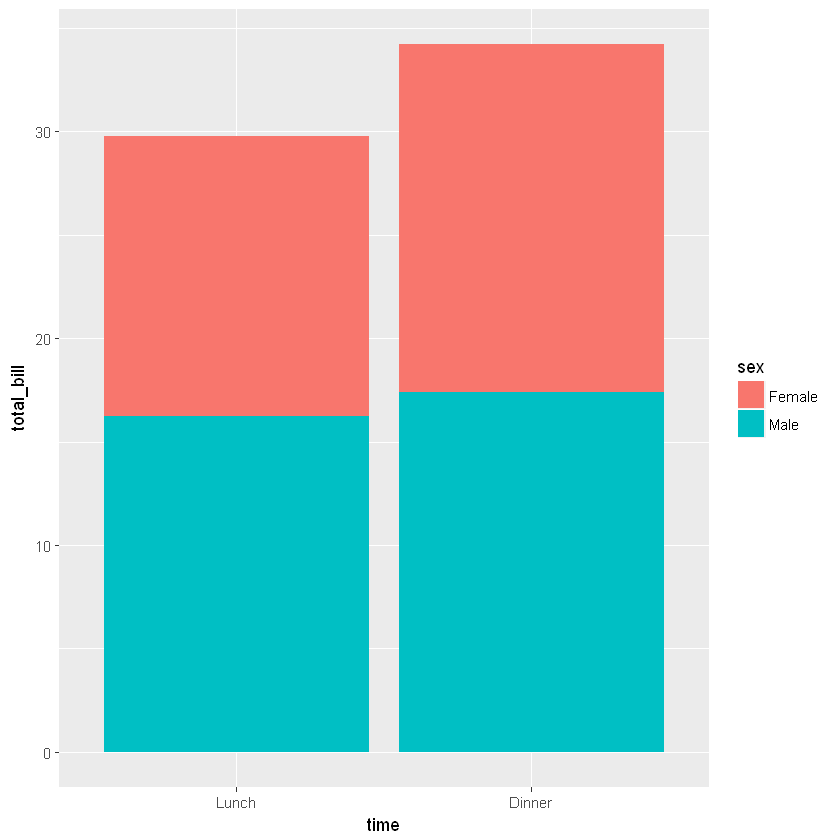

In [45]:
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) + geom_bar(stat="identity")

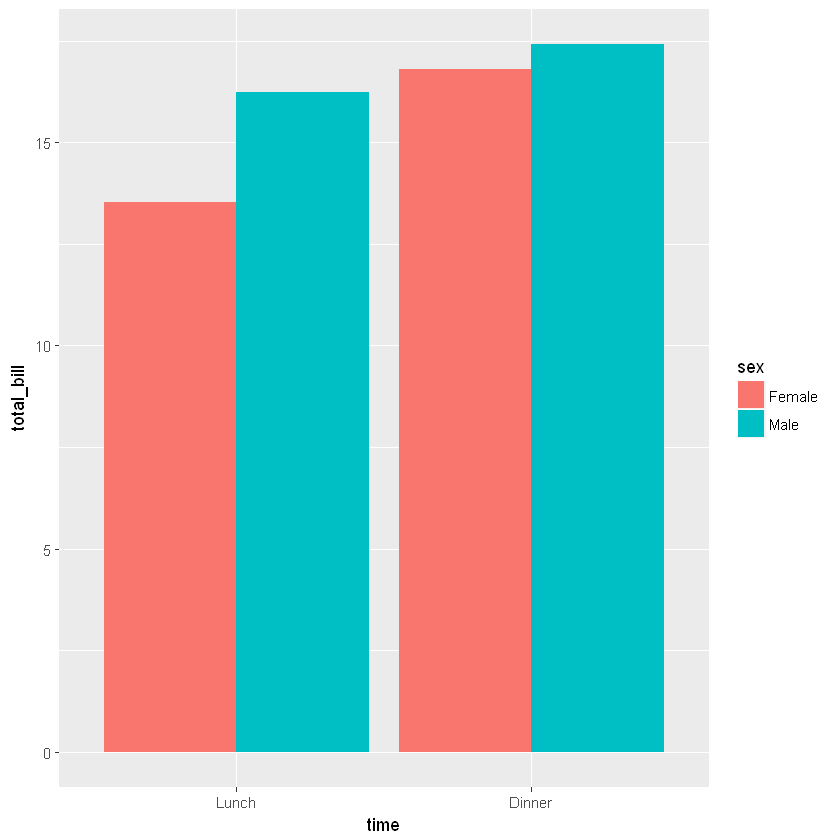

In [47]:
# geom_bar에서 position을 입력해주면 안에 채워지는 식이 아닌 
# 옆으로 나란히 보여지는 그래프가 그려집니다.
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge())

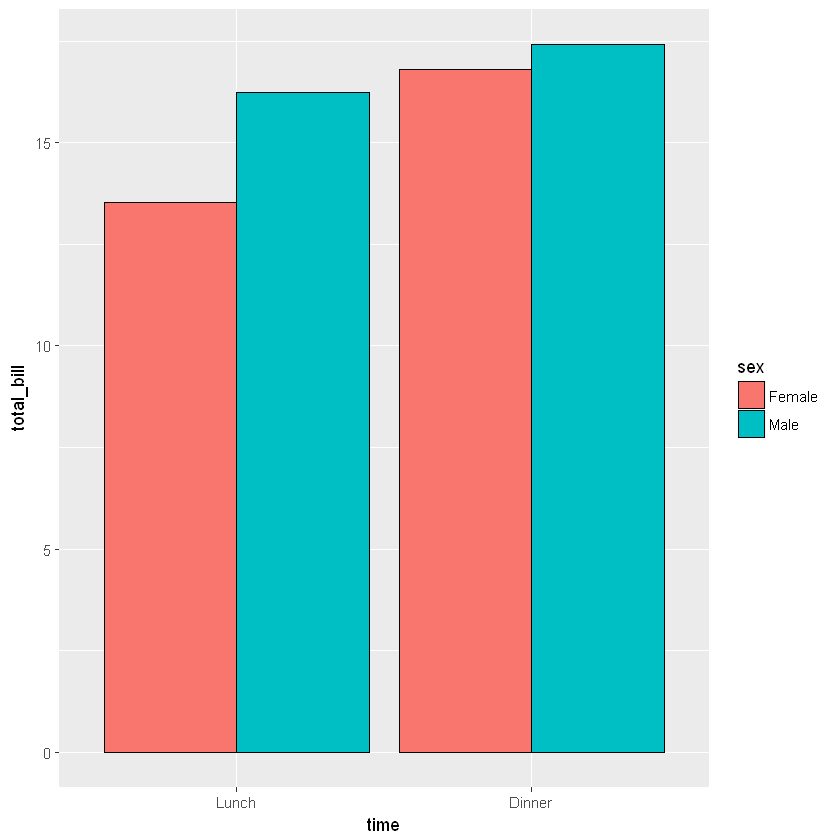

In [49]:
# 위에서 배운 것을 응용하여, colour에 'black'을 입력해주면, 
# 아래의 그림처럼 테두리가 생깁니다.
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

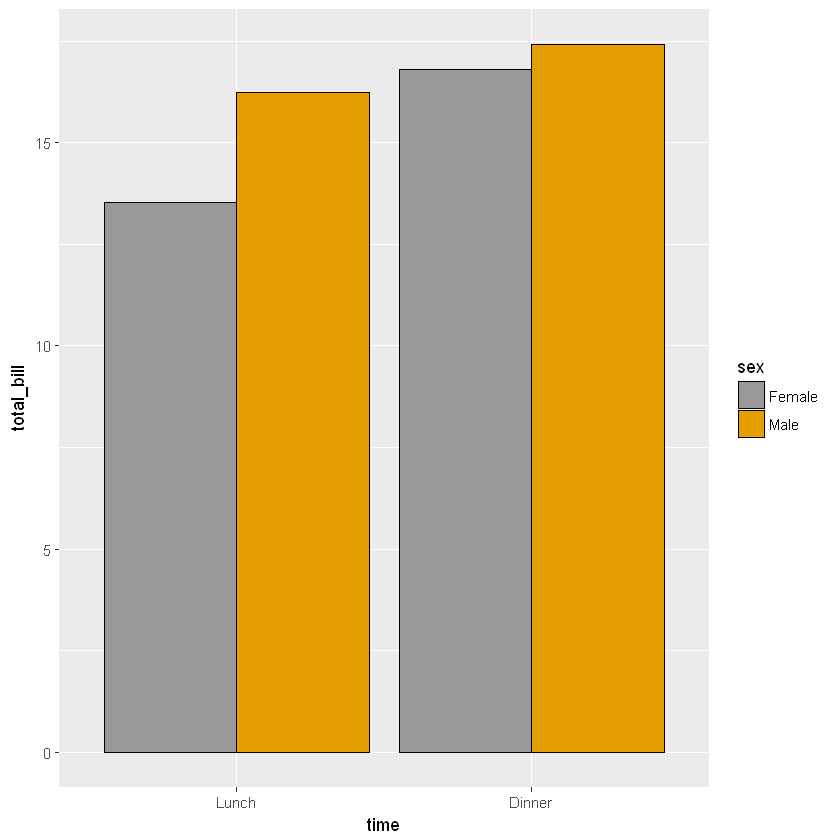

In [50]:
# 색(hex color code)의 값을 직접 manual 하게 입력 해줄 수도 있습니다. 
# rgb로 지정 해준 hex color code라는 것은 디지털 이미지에서 모두 쓰이므로 알아두면 유용
# http://htmlcolorcodes.com/
# 여기에서 확인도 가능합니다. 
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black") +
    scale_fill_manual(values=c("#999999", "#E69F00"))

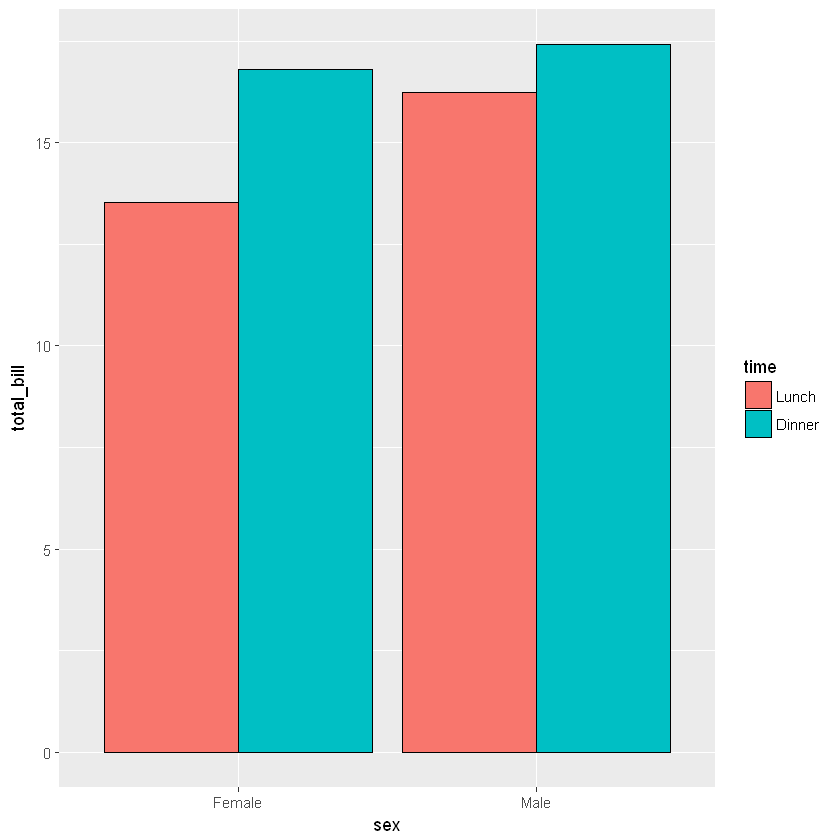

In [53]:
# 아래와 같이 sex와 time을 바꿔주면 새로운 방법으로 보여주게 됩니다. 
ggplot(data=dat1, aes(x=sex, y=total_bill, fill=time)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

# Line Graphs

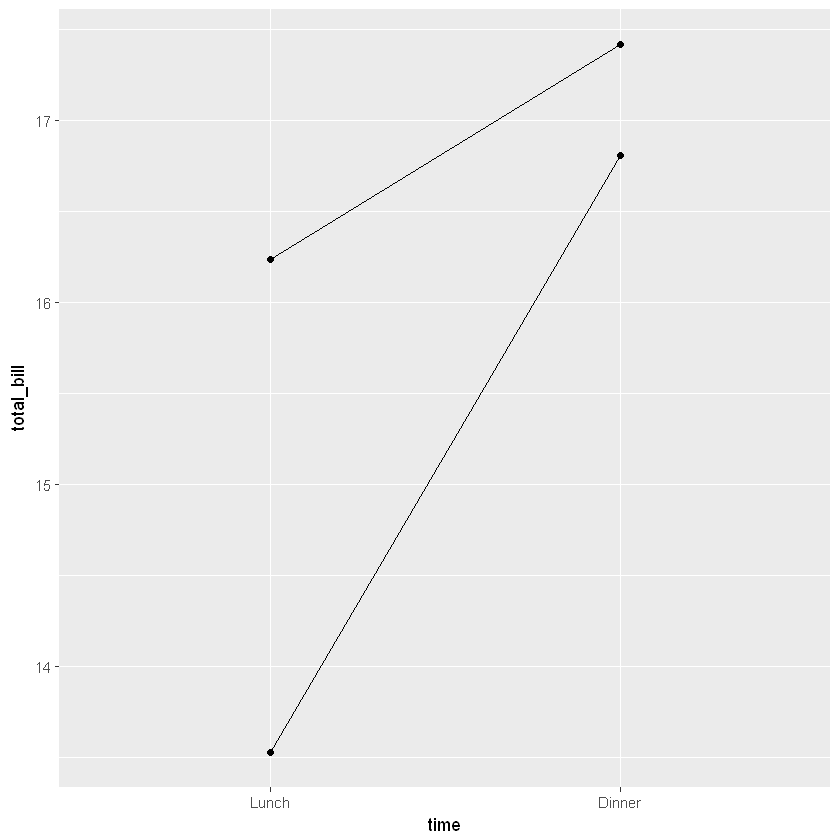

In [57]:
# 위의 그래프를 응용하여 두개 이상의 variables과 line graph를 그리도록 합니다.
# line이 두개가 생긴 것을 확인 할 수 있습니다.
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex)) +
    geom_line() +
    geom_point()

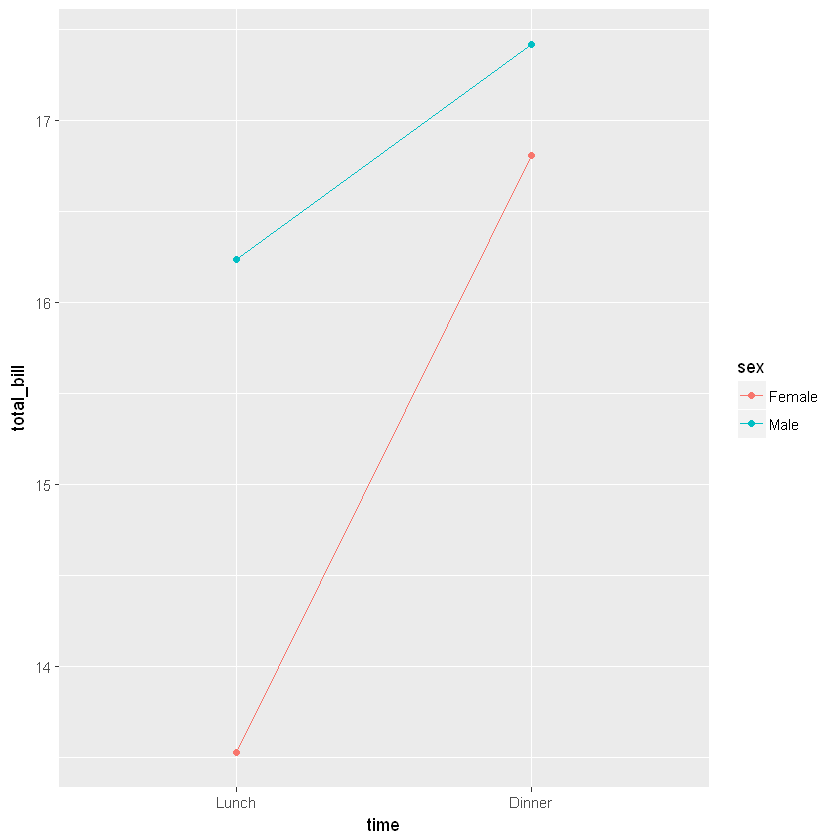

In [59]:
# group과 colour를 sex별로 지정 해준다고 입력해주면, 
# 아래와 같이 sex 별로 다른 색을 지정 해준다.
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, colour=sex)) +
    geom_line() +
    geom_point()

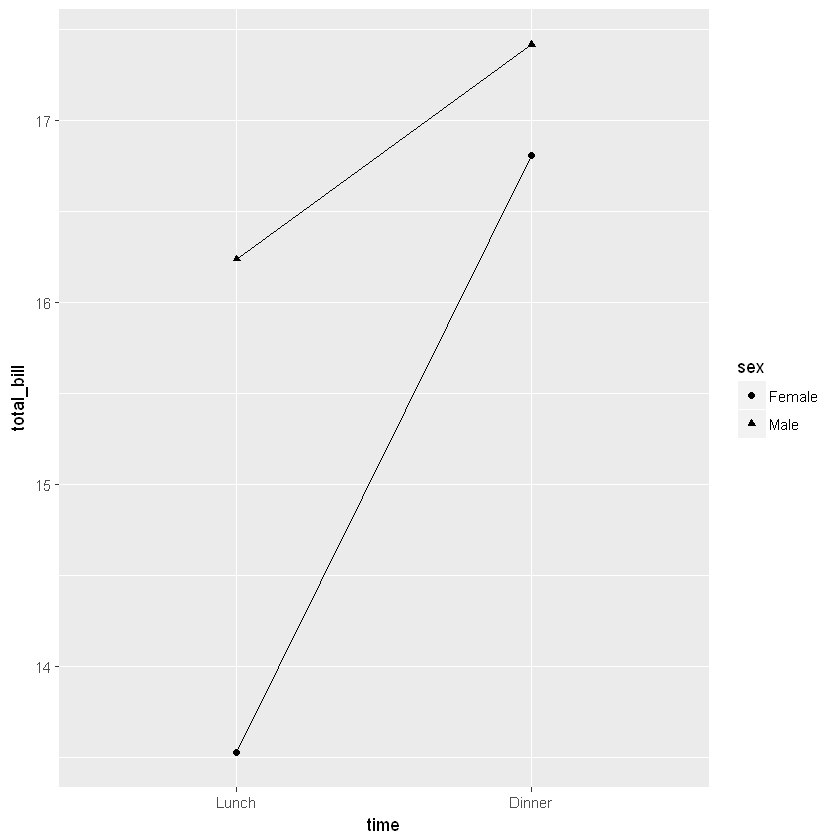

In [63]:
# colour가 아닌 shape을 넣어주면, 성별마다 포인트의 모양이 다른 것을 볼 수 있습니다. 
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) +
    geom_line() +
    geom_point()

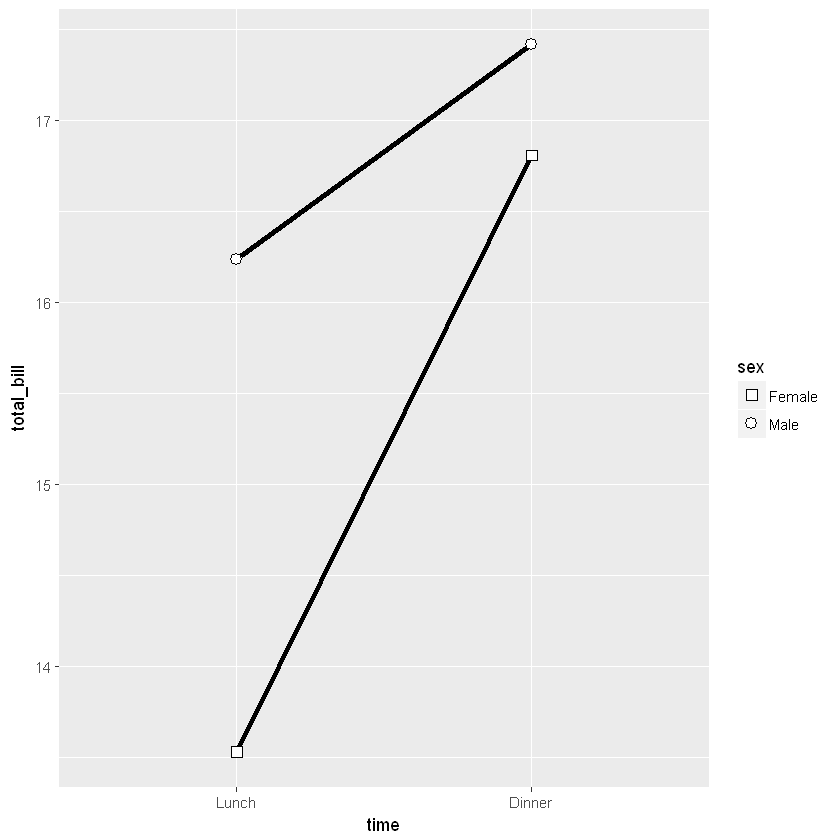

In [65]:
# 위의 그래프들 처럼 그래프의 모양을 좀 더 취향대로 바꿔주실 수 있습니다.
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex)) + 
    geom_line(size=1.5) + 
    geom_point(size=3, fill="white") +
    scale_shape_manual(values=c(22,21))

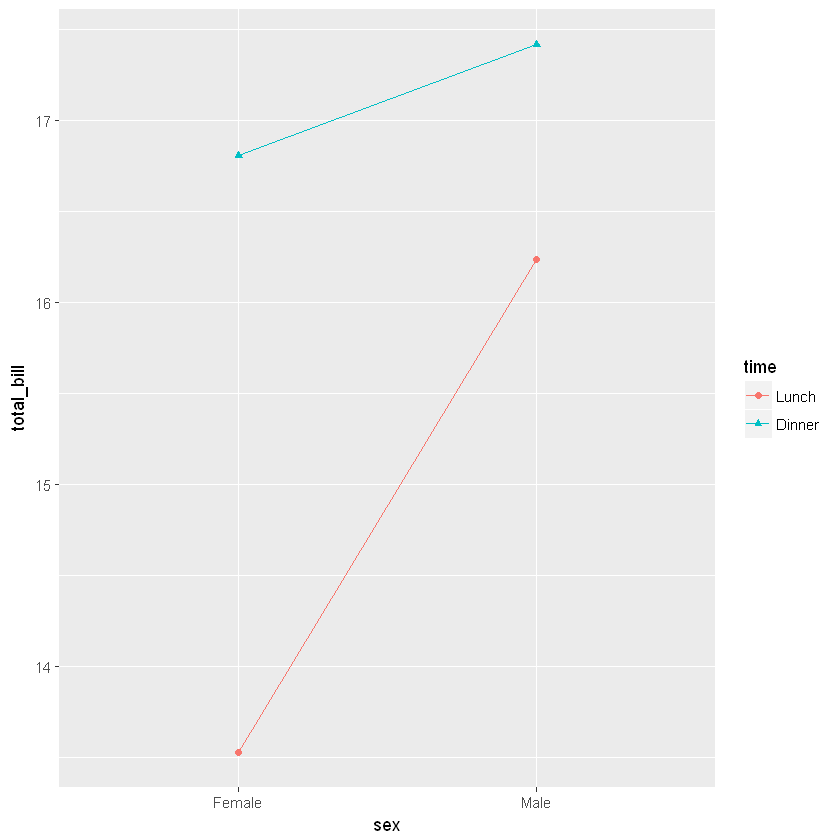

In [67]:
# Bar Graph에서 했던 것과 같이 sex와 time을 바꿔서 봐봅니다. 
ggplot(data=dat1, aes(x=sex, y=total_bill, group=time, shape=time, color=time)) +
    geom_line() +
    geom_point()

## 응용 그래프 # 1

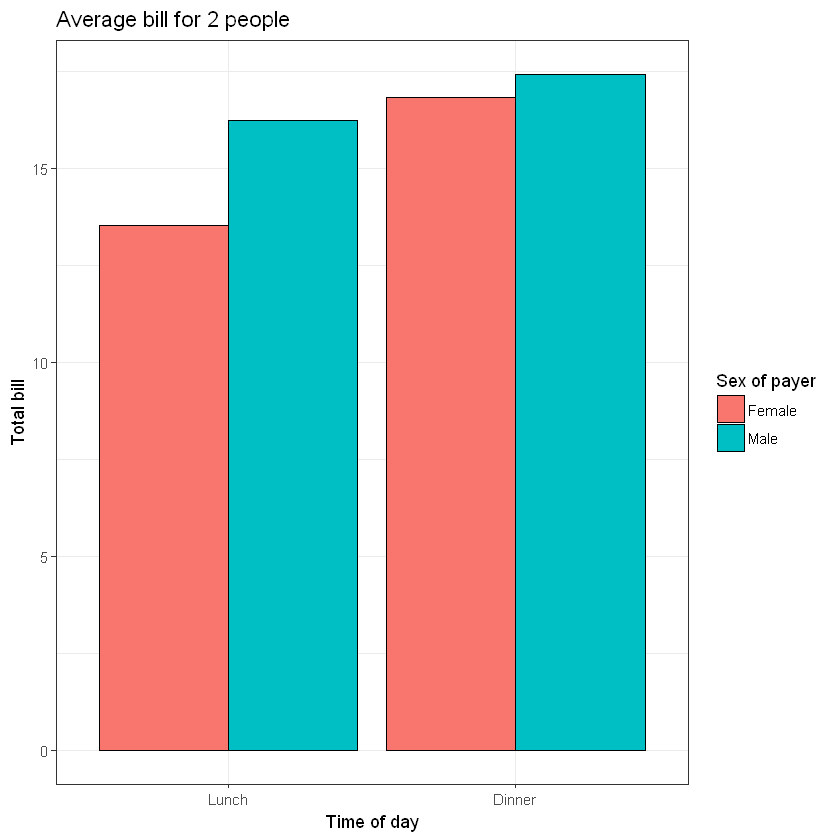

In [68]:
ggplot(data=dat1, aes(x=time, y=total_bill, fill=sex)) + 
    geom_bar(colour="black", stat="identity",
             position=position_dodge(),
             size=.3) +                        # Thinner lines
    scale_fill_hue(name="Sex of payer") +      # Set legend title
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw()


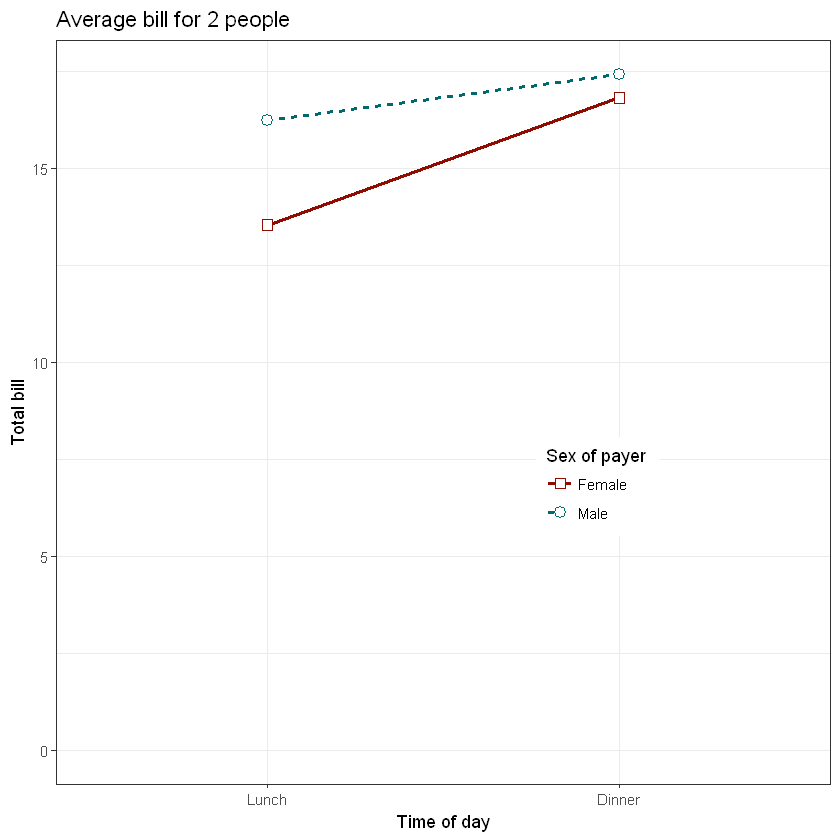

In [69]:
# A line graph
ggplot(data=dat1, aes(x=time, y=total_bill, group=sex, shape=sex, colour=sex)) + 
    geom_line(aes(linetype=sex), size=1) +     # Set linetype by sex
    geom_point(size=3, fill="white") +         # Use larger points, fill with white
    expand_limits(y=0) +                       # Set y range to include 0
    scale_colour_hue(name="Sex of payer",      # Set legend title
                     l=30)  +                  # Use darker colors (lightness=30)
    scale_shape_manual(name="Sex of payer",
                       values=c(22,21)) +      # Use points with a fill color
    scale_linetype_discrete(name="Sex of payer") +
    xlab("Time of day") + ylab("Total bill") + # Set axis labels
    ggtitle("Average bill for 2 people") +     # Set title
    theme_bw() +
    theme(legend.position=c(.7, .4))           # Position legend inside
                                               # This must go after theme_bw

## 응용 그래프 # 2

In [71]:
# text로 그리는 식으로 테이블을 만들 수도 있다. 
datn <- read.table(header=TRUE, text='
supp dose length
  OJ  0.5  13.23
  OJ  1.0  22.70
  OJ  2.0  26.06
  VC  0.5   7.98
  VC  1.0  16.77
  VC  2.0  26.14
')
datn

supp,dose,length
OJ,0.5,13.23
OJ,1.0,22.70
OJ,2.0,26.06
VC,0.5,7.98
VC,1.0,16.77
VC,2.0,26.14


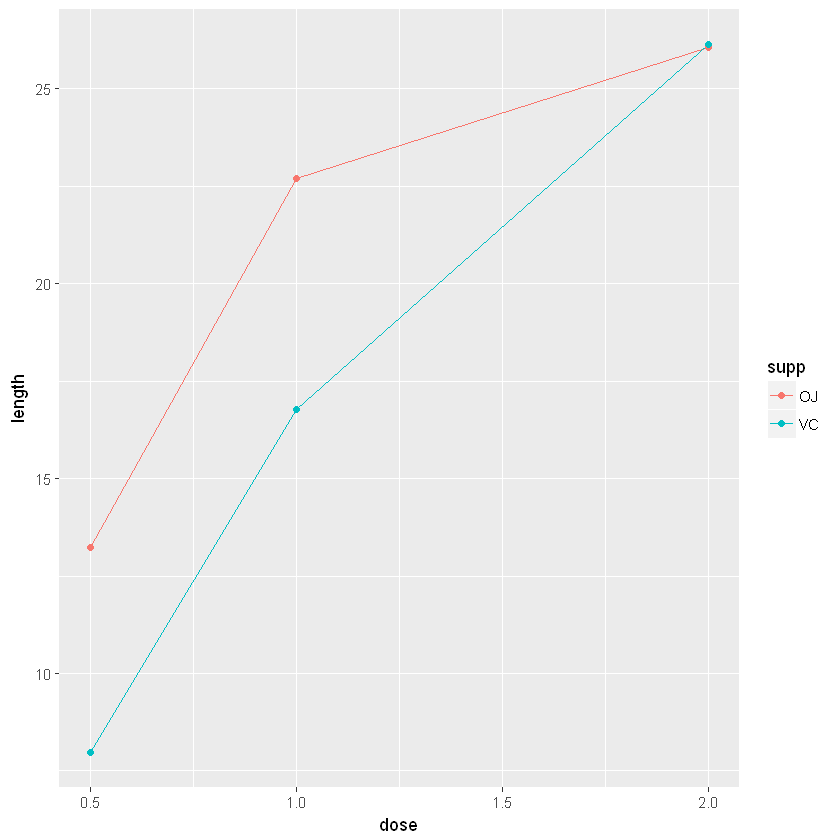

In [72]:
ggplot(data=datn, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

위의 데이터를 복사하여 dose를 factor로 지정하여 만들어보고,  
원본 데이터랑 비교 하도록 하겠습니다.  
dose를 factor로 변환한 후에 그래프를 그리는 것과,  
factor로 받으면서 동시에 그래프를 그리는 것을 해보려 합니다. 

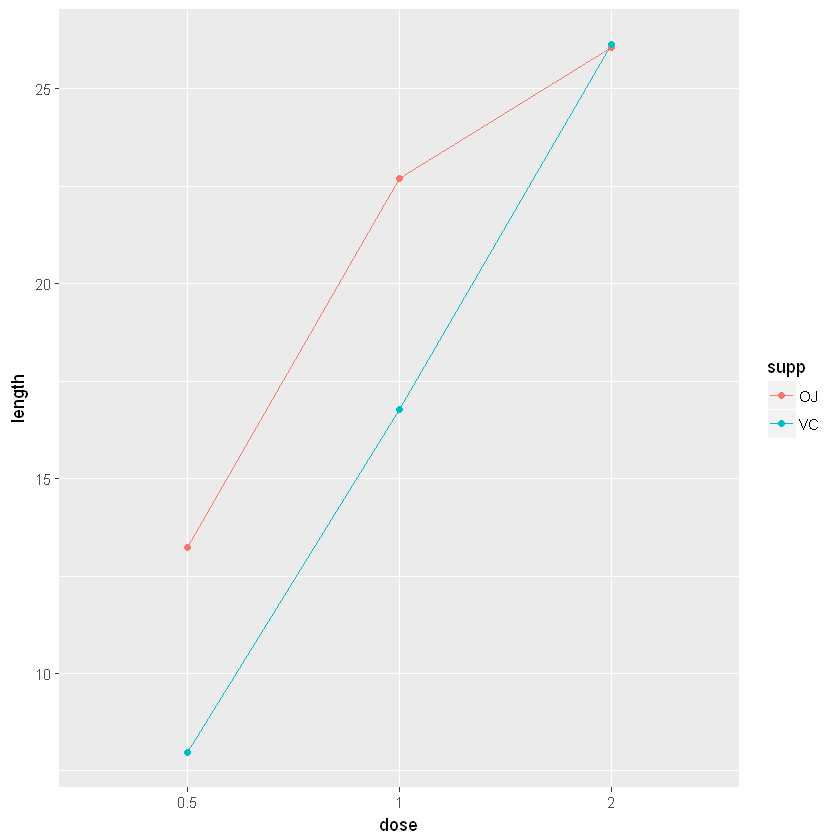

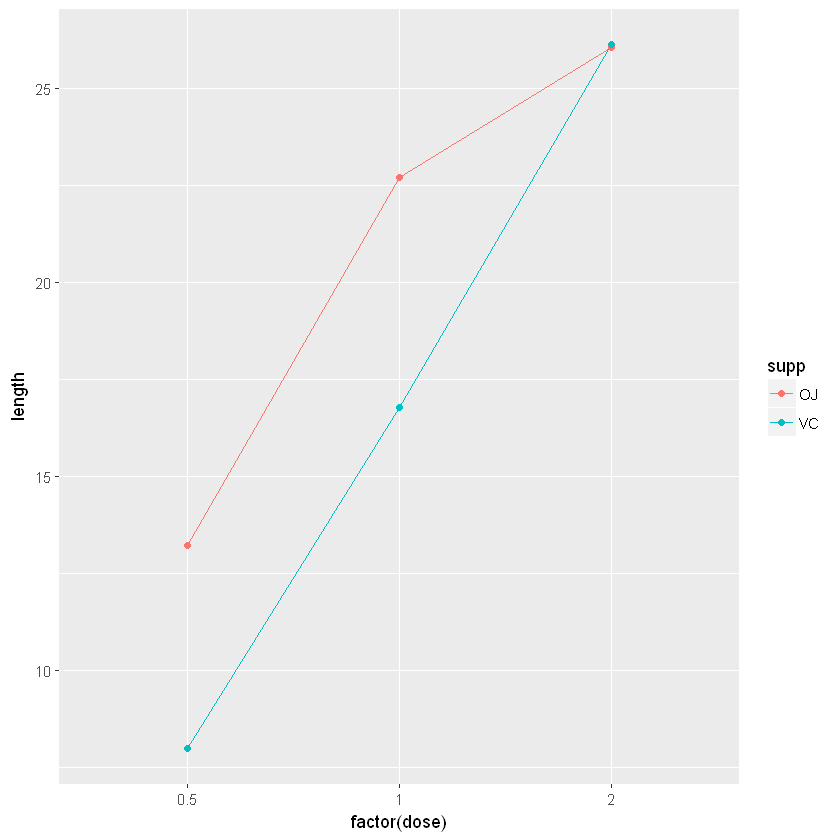

In [73]:
datn2 <- datn
datn2$dose <- factor(datn2$dose)
ggplot(data=datn2, aes(x=dose, y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

ggplot(data=datn, aes(x=factor(dose), y=length, group=supp, colour=supp)) +
    geom_line() +
    geom_point()

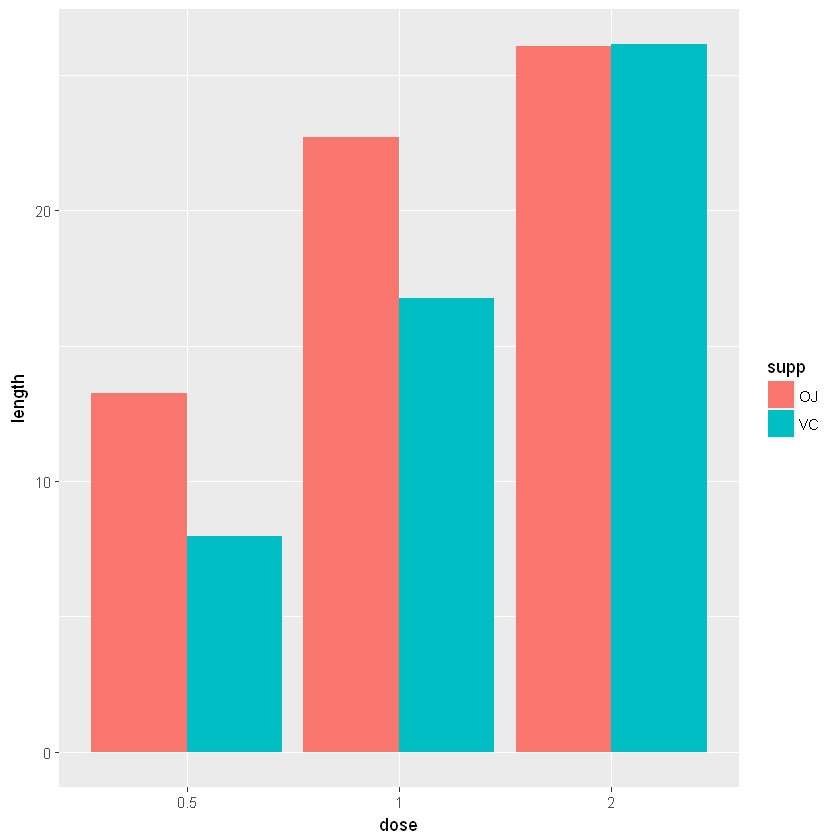

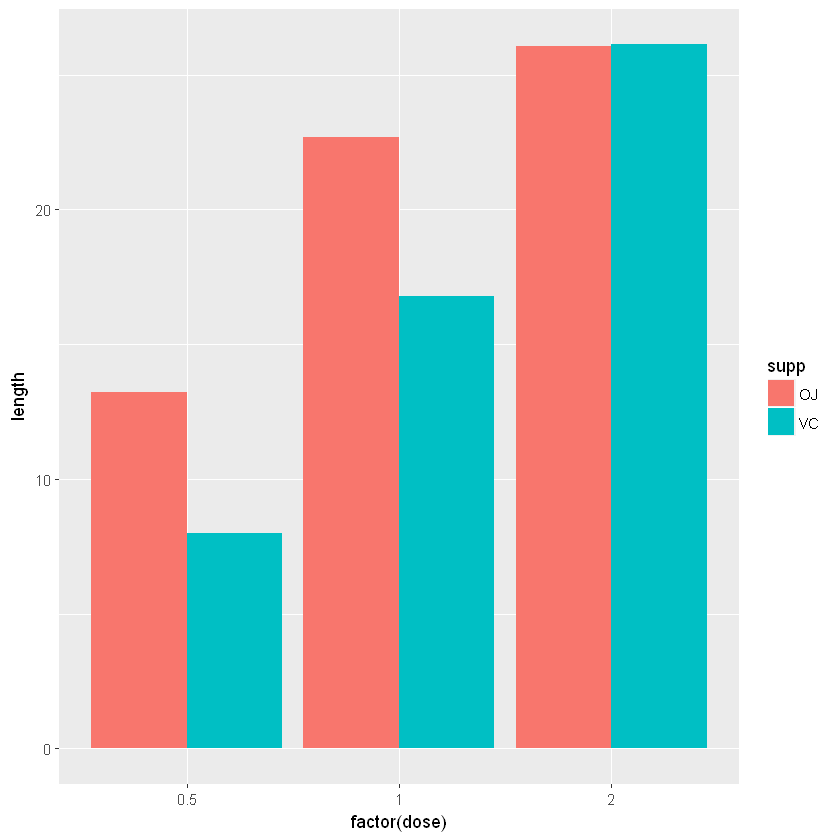

In [74]:
# 바 그래프로 위와 같이 했다. 
ggplot(data=datn2, aes(x=dose, y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())

ggplot(data=datn, aes(x=factor(dose), y=length, fill=supp)) +
    geom_bar(stat="identity", position=position_dodge())

http://www.cookbook-r.com/Graphs/Plotting_distributions_(ggplot2)/